# Unsupervised Learning - Principal Components Analysis



## Practical

Review PCA concepts.

### Exercise 1 - Crowdedness at the Campus Gym

The dataset consists of 26,000 people counts (about every 10 minutes) over the last year. In addition, I gathered extra info including weather and semester-specific information that might affect how crowded it is. The label is the number of people, which I'd like to predict given some subset of the features.

Label:

- Number of people

Features:

- timestamp (int; number of seconds since beginning of day)
- day_of_week (int; 0 - 6)
- is_weekend (int; 0 or 1)
- is_holiday (int; 0 or 1)
- apparent_temperature (float; degrees fahrenheit)
- temperature (float; degrees fahrenheit)
- is_start_of_semester (int; 0 or 1)

[Based off the Kaggle dataset](https://www.kaggle.com/nsrose7224/crowdedness-at-the-campus-gym).

**Task** - We are going to apply Principal Component Analysis on the given dataset using scikit-learn (bonus points if you use your own optimized Python version). We want to find the components with the maximum variance. Features with little or no variance are dropped and then the data is trained on transformed dataset to apply machine learning models.

1. Read in the gym dataset.
2. Explore the data, the summay statistics and identify any strong positive or negative correlations between the features.
3. Convert temperature and apparent temperature from Fahrenheit to Celcius.
4. Extract the features to a new dataframe. The column you would eventually predict is `number_people`.
5. Make a heatmap of the correlation.
6. Run PCA on the feature dataframe, and plot the explained variance ratio of the principal components.
7. Which components would you drop and why?
8. Re-run PCA on the feature dataframe, restricting it to the number of principal components you want and plot the explained variance ratios again.

In [24]:
#import dataset
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df=pd.read_csv('gym.csv')

In [17]:
#Summary statistics
df.describe()
print(df.shape)
df.dropna(how='any', inplace=True)
print(df.shape)

(26066, 8)
(26066, 8)


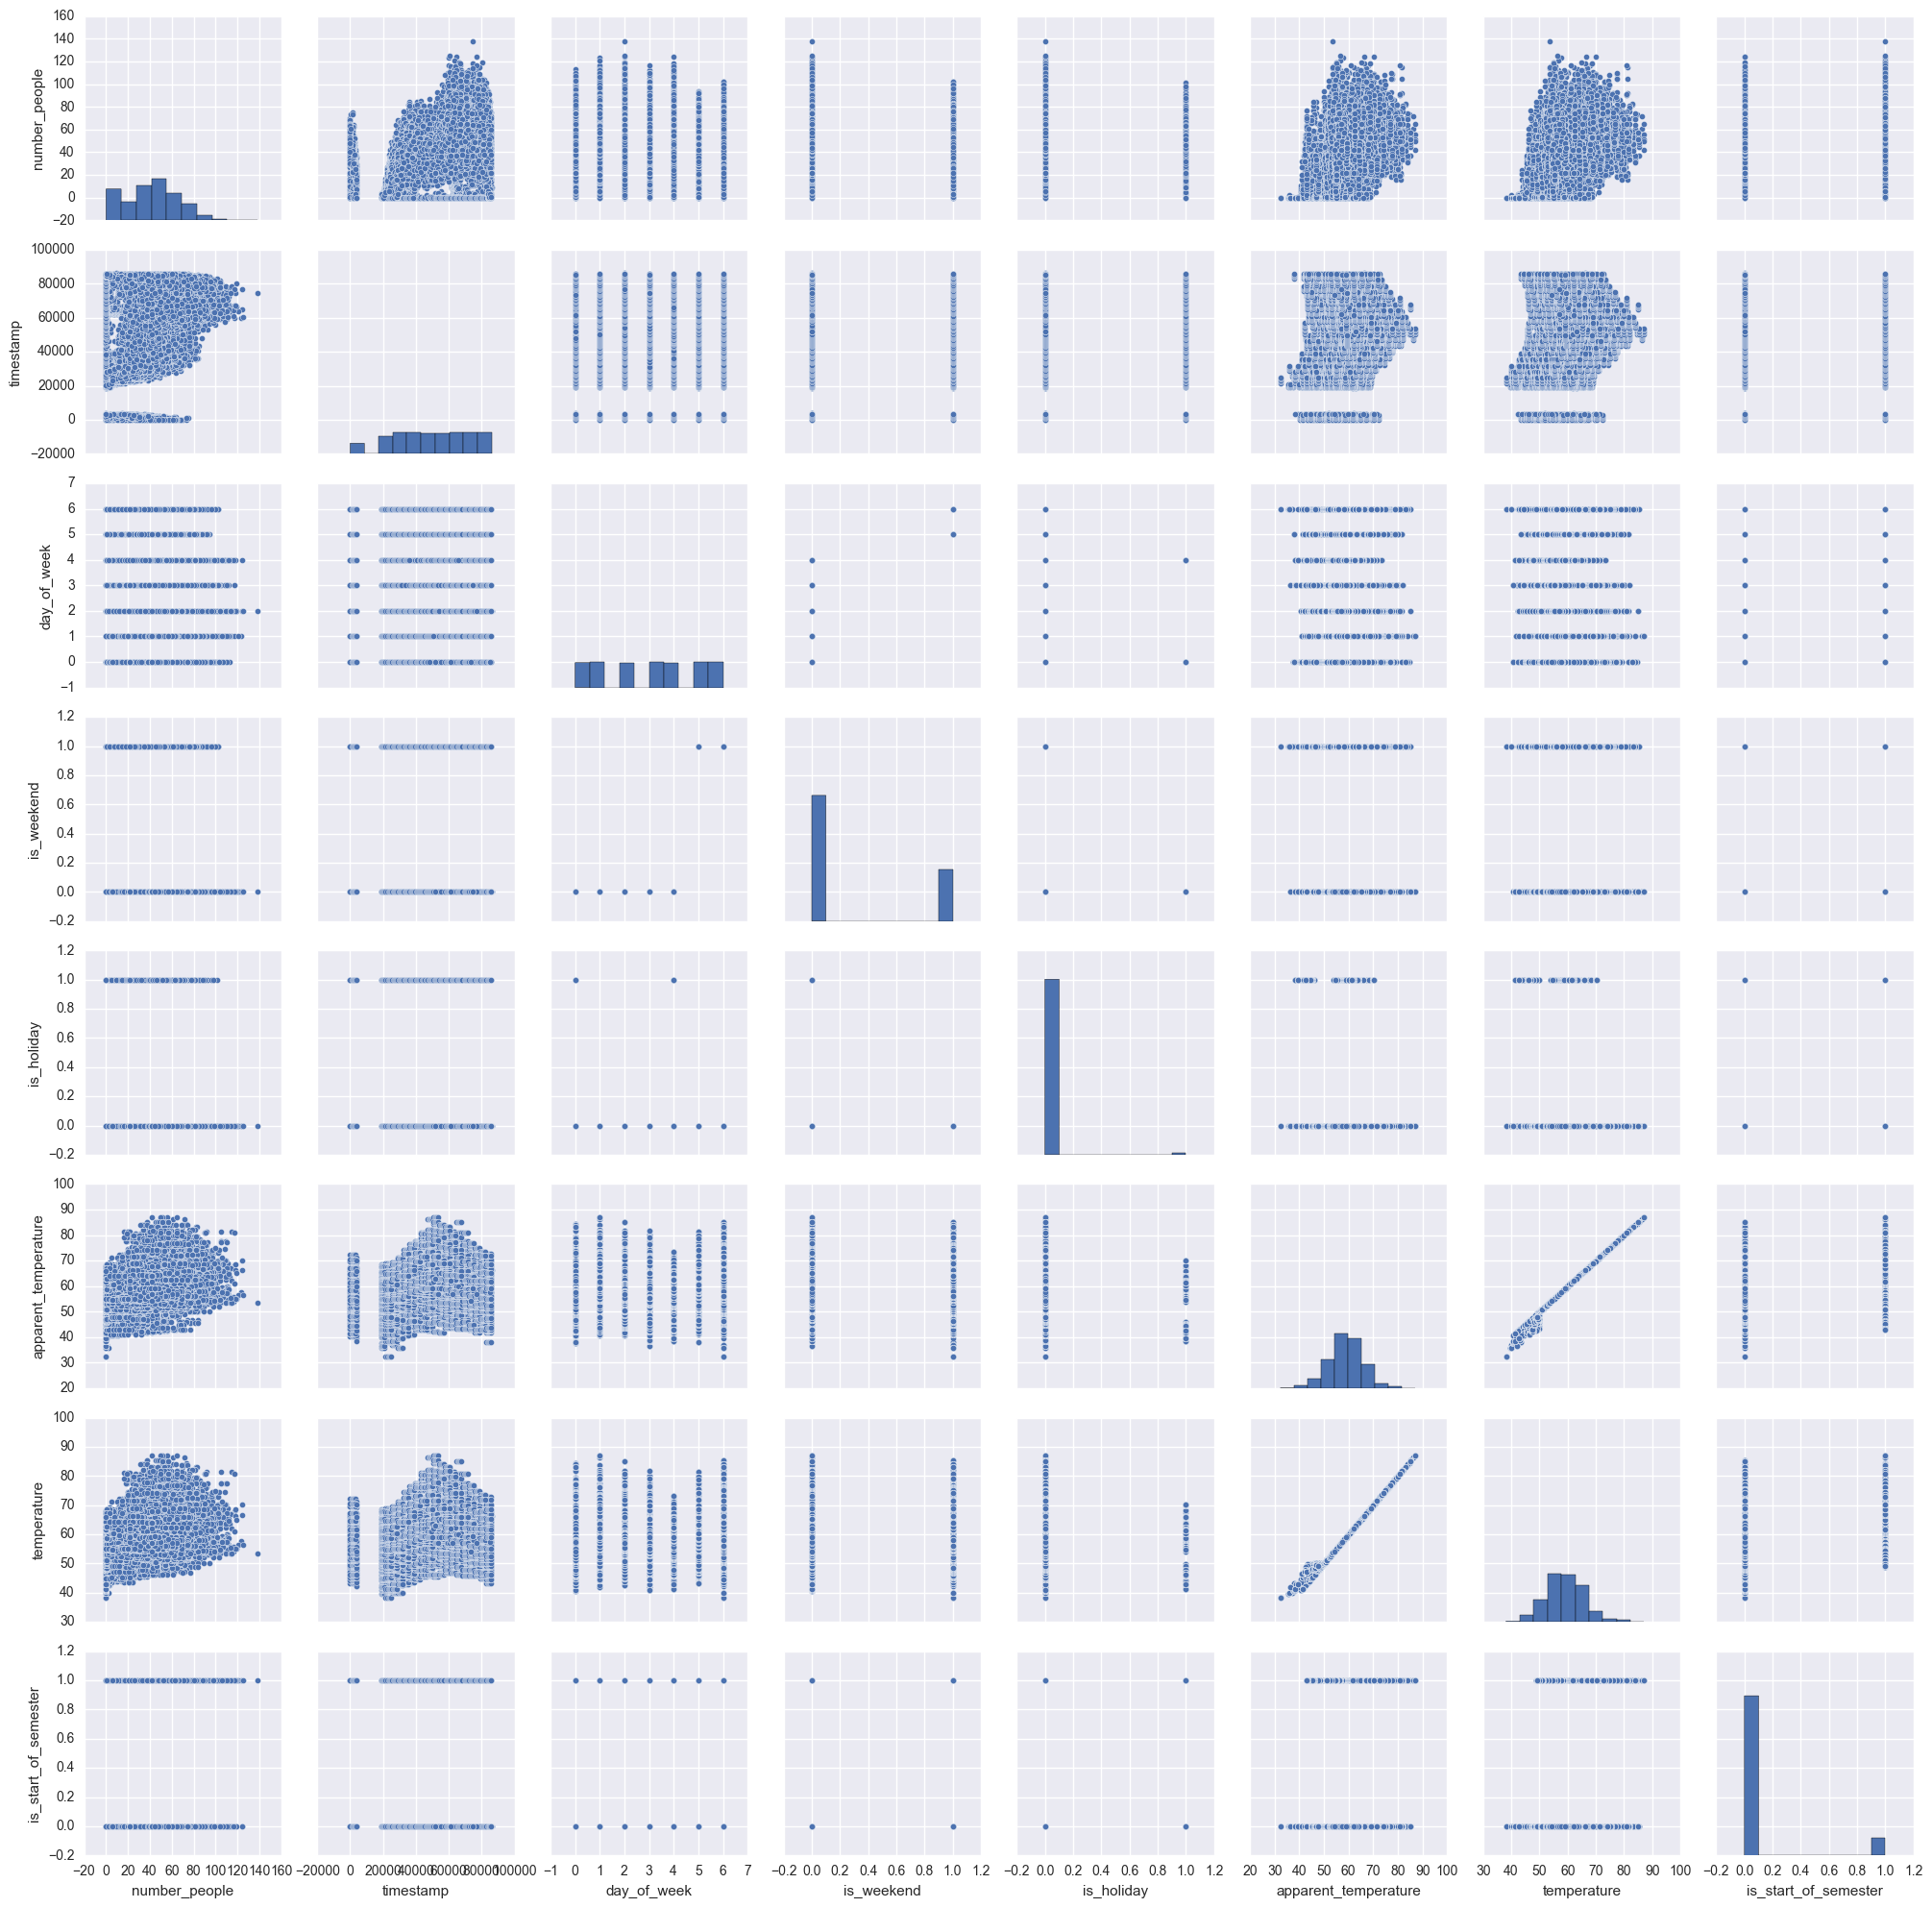

In [4]:
#identify strong positive or negative correlations between the features
sns.pairplot(df)

#it seems ot be a correlation between timestamp and number if people
#is_weekend and day_of_week are correlated to each other
#between apparent_temperature and temperature there is a strong positive correlation

In [37]:
#3.Convert temperature and apparent temperature from Fahrenheit to Celcius.

df['temperature_C']=(df['temperature'] - 32) * 5/9
df['apparent_temperature_C']=(df['apparent_temperature'] - 32) * 5/9
df.drop(['temperature','apparent_temperature'], axis=1, inplace=True)


In [38]:
#Extract the features to a new dataframe. The column you would eventually predict is number_people.
X=df.iloc[:,1:]
y=df.iloc[:,:1]
X.head()

,timestamp,day_of_week,is_weekend,is_holiday,is_start_of_semester,temperature_C,apparent_temperature_C
0,11,5,1,0,0,17.222222,17.222222
1,906,5,1,0,0,17.222222,17.222222
2,1207,5,1,0,0,17.222222,17.222222
3,1507,5,1,0,0,17.222222,17.222222
4,1808,5,1,0,0,17.222222,17.222222


In [39]:
from sklearn.preprocessing import StandardScaler
X_std= StandardScaler().fit_transform(X)

In [40]:
#Covariance matrix of the standardized X feature matrix
cov_matrix=np.cov(X_std.T)
cov_matrix

array([[  1.00003837e+00,   2.18847717e-03,   5.77387502e-03,
          1.50149876e-05,  -8.02916199e-03,   1.34214105e-01,
          1.35667814e-01],
       [  2.18847717e-03,   1.00003837e+00,   7.95212311e-01,
         -9.05719378e-02,   5.80085557e-03,  -1.10306712e-02,
         -1.15536602e-02],
       [  5.77387502e-03,   7.95212311e-01,   1.00003837e+00,
         -6.92589313e-02,   3.43424204e-03,   3.07870155e-03,
          3.09539228e-03],
       [  1.50149876e-05,  -9.05719378e-02,  -6.92589313e-02,
          1.00003837e+00,   8.38049190e-02,  -5.92082493e-02,
         -6.80578465e-02],
       [ -8.02916199e-03,   5.80085557e-03,   3.43424204e-03,
          8.38049190e-02,   1.00003837e+00,   9.22584738e-02,
          9.26260109e-02],
       [  1.34214105e-01,  -1.10306712e-02,   3.07870155e-03,
         -5.92082493e-02,   9.22584738e-02,   1.00003837e+00,
          9.95876897e-01],
       [  1.35667814e-01,  -1.15536602e-02,   3.09539228e-03,
         -6.80578465e-02,   9.26

In [41]:
#Covariance matrix of the standardized X feature matrix
##X_std is standardized, that's why the covariance and the correlation is almost the same (std is one)
corr_matrix=df.corr()
corr_matrix

,number_people,timestamp,day_of_week,is_weekend,is_holiday,is_start_of_semester,temperature_C,apparent_temperature_C
number_people,1.000000,0.516721,-0.198662,-0.212955,-0.023754,0.188743,0.365247,0.371589
timestamp,0.516721,1.000000,0.002188,0.005774,0.000015,-0.008029,0.134209,0.135663
day_of_week,-0.198662,0.002188,1.000000,0.795182,-0.090568,0.005801,-0.011030,-0.011553
is_weekend,-0.212955,0.005774,0.795182,1.000000,-0.069256,0.003434,0.003079,0.003095
is_holiday,-0.023754,0.000015,-0.090568,-0.069256,1.000000,0.083802,-0.059206,-0.068055
is_start_of_semester,0.188743,-0.008029,0.005801,0.003434,0.083802,1.000000,0.092255,0.092622
temperature_C,0.365247,0.134209,-0.011030,0.003079,-0.059206,0.092255,1.000000,0.995839
apparent_temperature_C,0.371589,0.135663,-0.011553,0.003095,-0.068055,0.092622,0.995839,1.000000


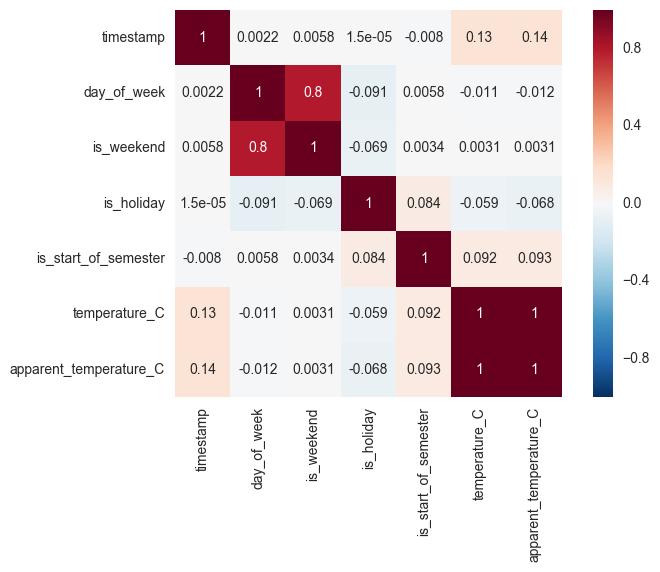

In [42]:
#Make a heatmap of the correlation.

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(cov_matrix, square=True, annot=True)
col=['timestamp','day_of_week','is_weekend','is_holiday','is_start_of_semester','temperature_C','apparent_temperature_C']
col_r = col[::-1] 
ax.set_xticklabels(col,rotation=90)
ax.set_yticklabels(col_r, rotation=0)

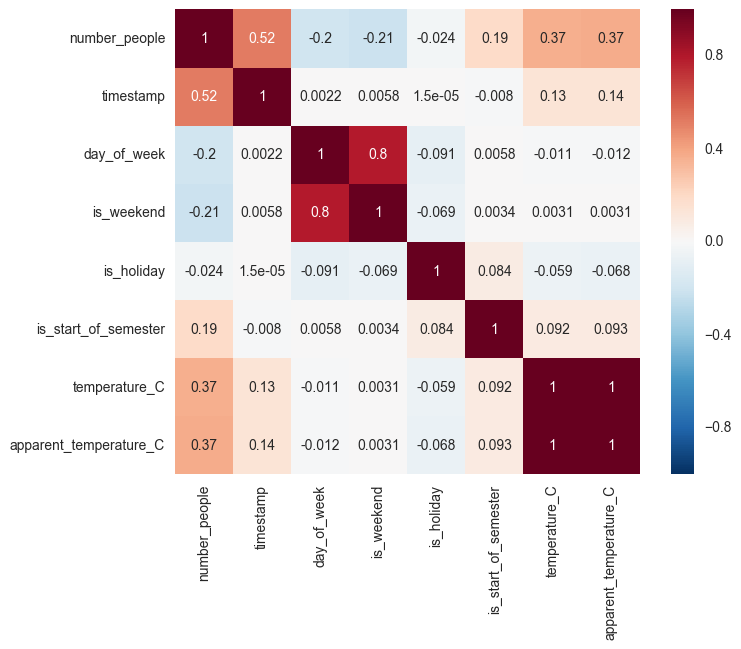

In [45]:
#heatmap for correlation with number of people
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_matrix, square=True, annot=True)


In [46]:
#6.Run PCA on the feature dataframe, and plot the explained variance ratio of the principal components.
from sklearn.decomposition import PCA
pca=PCA()
pca.fit(X_std)

PCA(copy=True, n_components=None, whiten=False)

In [47]:
#the explained variance ratio
pca.explained_variance_ratio_

array([ 0.29321519,  0.25870224,  0.15378657,  0.13950357,  0.12501011,
        0.02919394,  0.00058838])

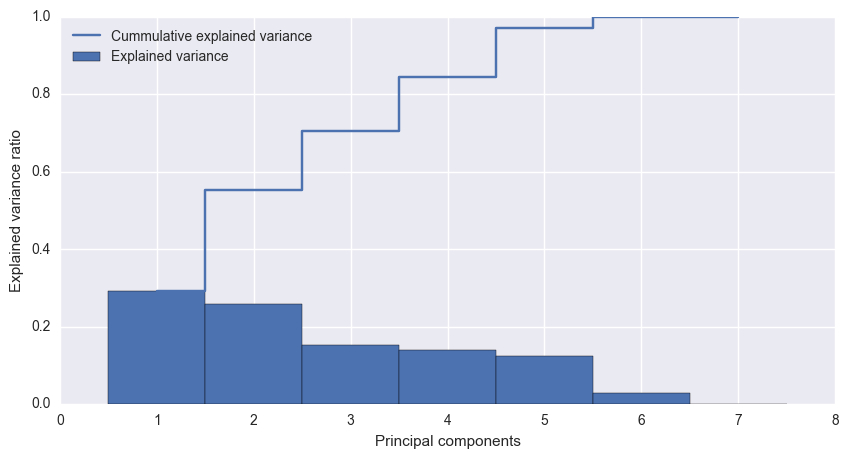

In [48]:
#plot the explained variance ratio

x_lab=np.arange(1, len(pca.explained_variance_ratio_)+1 )

fig, ax=plt.subplots(figsize=(10,5))
plt.bar(x_lab,pca.explained_variance_ratio_, width=1, label='Explained variance',align='center')
plt.step(x_lab,np.cumsum(pca.explained_variance_ratio_), label='Cummulative explained variance',  where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')


#7.Which components would you drop and why?
# I would drop the last 2 components, becasue the explained variance ratio for these components is very low.

In [83]:
pca.components_

array([[  1.75942191e-01,   1.08193253e-03,   1.11398133e-02,
         -7.51120638e-02,   1.13801983e-01,   6.89085976e-01,
          6.89555570e-01],
       [ -2.55856223e-03,  -7.01305572e-01,  -6.99271155e-01,
          1.36926632e-01,   9.21317026e-03,   1.34640473e-02,
          1.29897481e-02],
       [  1.06268119e-01,  -6.34929348e-02,  -7.71102708e-02,
         -6.70096304e-01,  -7.27638858e-01,   7.93830011e-03,
          1.33925406e-02],
       [  9.21770284e-01,   2.19323554e-02,   3.24625616e-02,
          3.23500462e-01,  -1.71183485e-01,  -8.53387625e-02,
         -8.69807888e-02],
       [  3.28758900e-01,  -4.88541053e-02,  -7.56528001e-02,
         -6.49193396e-01,   6.54344850e-01,  -1.34416058e-01,
         -1.26966886e-01],
       [ -8.60368013e-04,  -7.08002326e-01,   7.05812832e-01,
         -2.08195656e-02,   5.84517999e-03,  -8.07158306e-03,
         -5.23847022e-03],
       [  1.12886644e-03,  -1.71050114e-03,   9.18631121e-04,
         -6.49225677e-03,   8.85

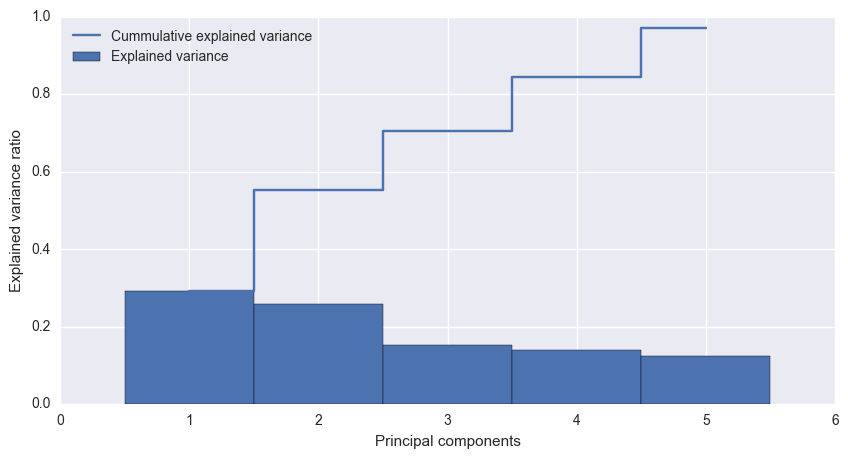

In [49]:
#8.Re-run PCA on the feature dataframe, restricting it to the number of principal components you want and plot the explained variance ratios again.
pca=PCA(n_components=5)
pca.fit(X_std)

x_lab=np.arange(1, len(pca.explained_variance_ratio_)+1 )

fig, ax=plt.subplots(figsize=(10,5))
plt.bar(x_lab,pca.explained_variance_ratio_, width=1, label='Explained variance',align='center')
plt.step(x_lab,np.cumsum(pca.explained_variance_ratio_), label='Cummulative explained variance',  where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')


### Exercise 2 - IMDB Movie Data

How can we tell the greatness of a movie before it is released in cinema?

This question puzzled me for a long time since there is no universal way to claim the goodness of movies. Many people rely on critics to gauge the quality of a film, while others use their instincts. But it takes the time to obtain a reasonable amount of critics review after a movie is released. And human instinct sometimes is unreliable.

To answer this question, I scraped 5000+ movies from IMDB website using a Python library called "scrapy".

The scraping process took 2 hours to finish. In the end, I was able to obtain all needed 28 variables for 5043 movies and 4906 posters (998MB), spanning across 100 years in 66 countries. There are 2399 unique director names, and thousands of actors/actresses. Below are the 28 variables:

"movie_title" "color" "num_critic_for_reviews" "movie_facebook_likes" "duration" "director_name" "director_facebook_likes" "actor_3_name" "actor_3_facebook_likes" "actor_2_name" "actor_2_facebook_likes" "actor_1_name" "actor_1_facebook_likes" "gross" "genres" "num_voted_users" "cast_total_facebook_likes" "facenumber_in_poster" "plot_keywords" "movie_imdb_link" "num_user_for_reviews" "language" "country" "content_rating" "budget" "title_year" "imdb_score" "aspect_ratio"


[Based off the Kaggle dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset).

**Task** - We are going to apply Principal Component Analysis on the given dataset using scikit-learn (bonus points if you use your own optimized Python version). We want to find the components with the maximum variance. Features with little or no variance are dropped and then the data is trained on transformed dataset to apply machine learning models.

1. Read in the movie dataset.
2. Explore the data, the summay statistics and identify any strong positive or negative correlations between the features.
3. Some columns contain numbers, while others contain words. Do some filtering to extract only the numbered columns and not the ones with words into a new dataframe.
4. Remove null values and standardize the values.
5. Create hexbin visualizations to get a feel for how the correlations between different features compare to one another. Can you draw any conclusions about the features?
6. Create a heatmap of the pearson correlation of movie features. Detail your observations.
7. Perform PCA on the dataset, and plot the individual and cumulative explained variance superimposed on the same graph.
8. How many components do you want to use? Implement PCA and transform the dataset.
9. Create a 2D and 3D scatter plot of the the 1st 2 and the 1st 3 components.
10. Do you notice any distinct clusters in the plots? (*For future clustering assignment*)

In [51]:
#import dataset
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

df_movie=pd.read_csv('movie.csv')
df_movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [52]:
df_movie.describe()

/Users/adribadri/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,8.593500e+03,1411.000000,NaN,NaN,NaN,NaN,NaN,5.800000,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,3.435900e+04,3090.000000,NaN,NaN,NaN,NaN,NaN,6.600000,NaN,166.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,9.630900e+04,13756.500000,NaN,NaN,NaN,NaN,NaN,7.200000,NaN,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [61]:
# 2. correlations
df_movie.corr()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
num_critic_for_reviews,1.000000,0.258486,0.180674,0.271646,0.190016,0.480601,0.624943,0.263203,-0.033897,0.609387,0.119994,0.275707,0.282306,0.305303,-0.049786,0.683176
duration,0.258486,1.000000,0.173296,0.123558,0.088449,0.250298,0.314765,0.123074,0.013469,0.328403,0.074276,-0.135038,0.131673,0.261662,-0.090071,0.196605
director_facebook_likes,0.180674,0.173296,1.000000,0.120199,0.090723,0.144945,0.297057,0.119549,-0.041268,0.221890,0.021090,-0.063820,0.119601,0.170802,0.001642,0.162048
actor_3_facebook_likes,0.271646,0.123558,0.120199,1.000000,0.249927,0.308026,0.287239,0.473920,0.099368,0.230189,0.047451,0.096137,0.559662,0.052633,-0.003366,0.278844
actor_1_facebook_likes,0.190016,0.088449,0.090723,0.249927,1.000000,0.154468,0.192804,0.951661,0.072257,0.145461,0.022639,0.086873,0.390487,0.076099,-0.020049,0.135348
gross,0.480601,0.250298,0.144945,0.308026,0.154468,1.000000,0.637271,0.247400,-0.027755,0.559958,0.102179,0.030886,0.262768,0.198021,0.069346,0.378082
num_voted_users,0.624943,0.314765,0.297057,0.287239,0.192804,0.637271,1.000000,0.265911,-0.026998,0.798406,0.079621,0.007397,0.270790,0.410965,-0.014761,0.537924
cast_total_facebook_likes,0.263203,0.123074,0.119549,0.473920,0.951661,0.247400,0.265911,1.000000,0.091475,0.206923,0.036557,0.109971,0.628404,0.085787,-0.017885,0.209786
facenumber_in_poster,-0.033897,0.013469,-0.041268,0.099368,0.072257,-0.027755,-0.026998,0.091475,1.000000,-0.069018,-0.019559,0.061504,0.071228,-0.062958,0.013713,0.008918
num_user_for_reviews,0.609387,0.328403,0.221890,0.230189,0.145461,0.559958,0.798406,0.206923,-0.069018,1.000000,0.084292,-0.003147,0.219496,0.292475,-0.024719,0.400594


In [56]:
# 3.Some columns contain numbers, while others contain words. 
#Do some filtering to extract only the numbered columns and not the ones with words into a new dataframe.
col_num=df_movie.describe().columns
df_movie_num=df_movie[col_num]

/Users/adribadri/anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [57]:
# 4.Remove null values and standardize the values.
print(df_movie_num.shape)
df_movie_num.dropna(how='any', inplace=True)
print(df_movie_num.shape)

(5043, 16)
(3801, 16)


/Users/adribadri/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [58]:
from sklearn.preprocessing import StandardScaler


df_movie_std=StandardScaler().fit_transform(df_movie_num)

In [59]:
df_movie_std

array([[ 4.5095735 ,  2.98832019, -0.26178178, ...,  1.35599135,
        -0.93714334,  1.11149499],
       [ 1.10200625,  2.59159464, -0.07722967, ...,  0.59949222,
         0.68075908, -0.43369211],
       [ 3.53020144,  1.6659017 , -0.26178178, ...,  0.31580505,
         0.68075908,  3.54633526],
       ..., 
       [-0.18493721, -1.46382205, -0.16639161, ...,  0.50492983,
        -0.73845357,  0.45596107],
       [-0.88911381, -1.28749959, -0.26178178, ...,  0.41036744,
        -2.10089771, -0.43369211],
       [-0.9943356 , -0.89077404, -0.25653696, ...,  0.12668027,
        -0.73845357, -0.41234043]])

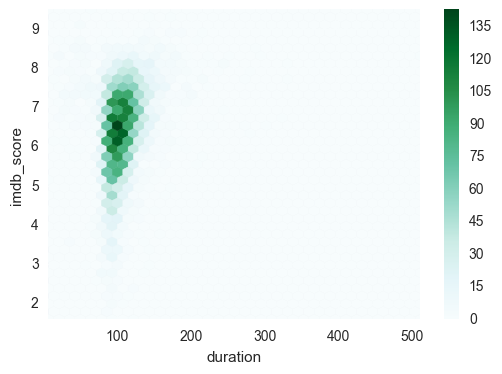

In [60]:
# 5.Create hexbin visualizations to get a feel for how the correlations between different features compare to one another. Can you draw any conclusions about the features?
df_movie.plot(y='imdb_score', x='duration', kind='hexbin', gridsize=35, sharex=False)

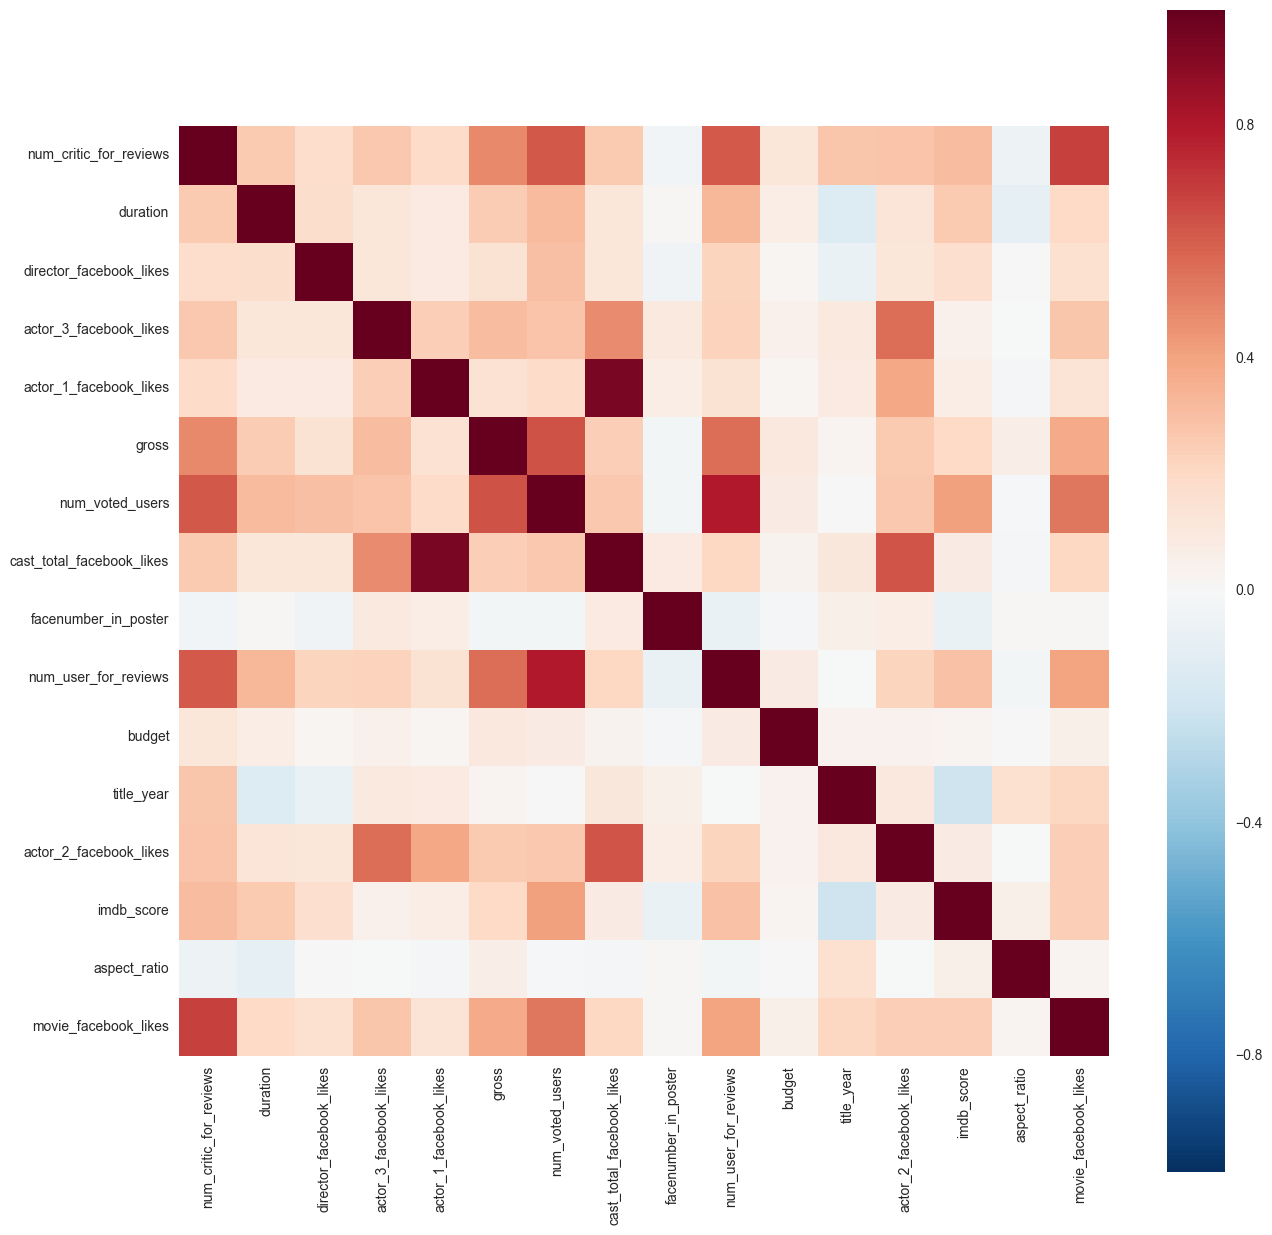

In [62]:
# 6. Create a heatmap of the pearson correlation of movie features. Detail your observations.
corr_matrix_movie=df_movie.corr()

import seaborn as sns

fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr_matrix_movie, square=True)

#there is a positive correlation between the cast_total_facebook likes and the actor_1 facebook likes
#there is also a positive correration between num_voted_users and user_reviews

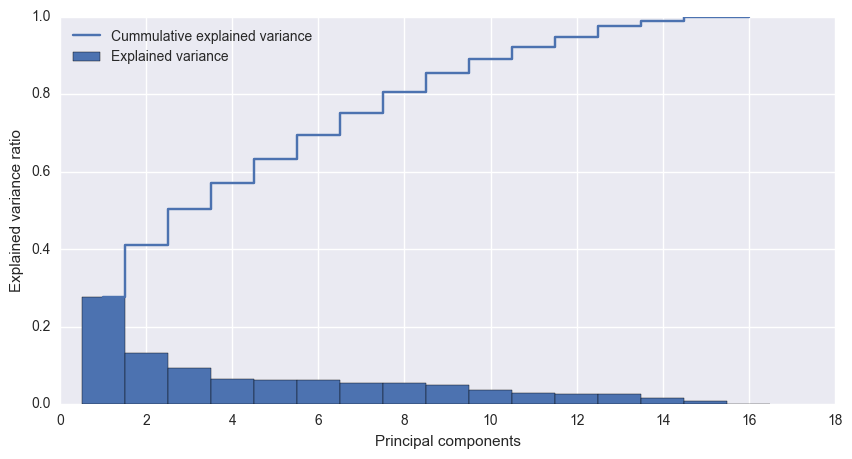

In [139]:
# 7.Perform PCA on the dataset, and plot the individual and cumulative explained variance superimposed on the same graph.
pca_movie=PCA()
pca_movie.fit(df_movie_std)

x_lab_movie=np.arange(1, len(pca_movie.explained_variance_ratio_)+1 )

fig, ax=plt.subplots(figsize=(10,5))
plt.bar(x_lab_movie,pca_movie.explained_variance_ratio_, width=1, label='Explained variance',align='center')
plt.step(x_lab_movie,np.cumsum(pca_movie.explained_variance_ratio_), label='Cummulative explained variance',  where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')

In [64]:
# 8.How many components do you want to use? Implement PCA and transform the dataset.
#I would use 11 principal components (they explain mre than 90% of the variance)

pca_movie_11=PCA(n_components=11)
df_movie_11=pca_movie_11.fit_transform(df_movie_std)

In [65]:
# 9.Create a 2D and 3D scatter plot of the the 1st 2 and the 1st 3 components.
df_movie_11.shape

(3801, 11)

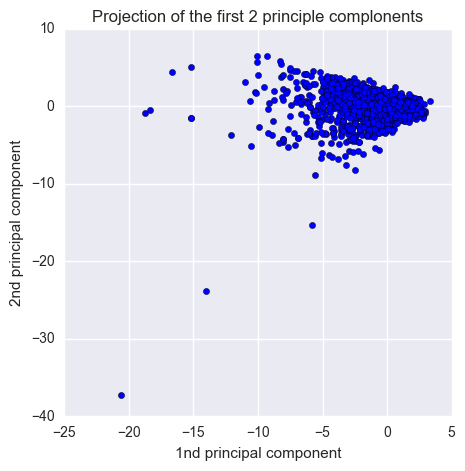

In [75]:
#1st 2 components

PC1=df_movie_11[:,0]
PC2=df_movie_11[:,1]
fig=plt.figure(figsize=(5,5))
plt.scatter(PC1,PC2)
plt.ylabel('2nd principal component')
plt.xlabel('1nd principal component')
plt.title("Projection of the first 2 principle complonents")

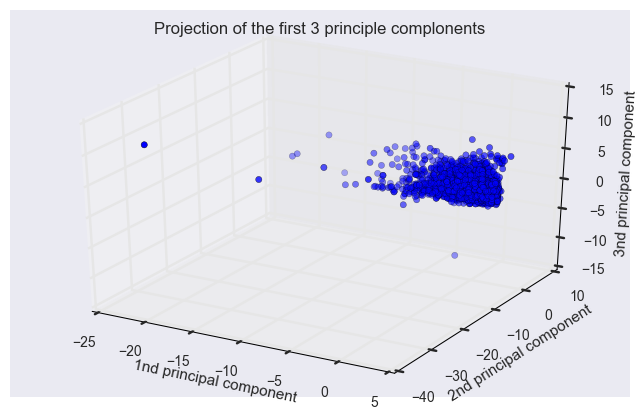

In [77]:
#1st 3 components
PC3=df_movie_11[:,2]


from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(PC1, PC2, PC3)
ax.set_ylabel('2nd principal component')
ax.set_xlabel('1nd principal component')
ax.set_zlabel('3nd principal component')
plt.title('Projection of the first 3 principle complonents')
# 10.Do you notice any distinct clusters in the plots? (For future clustering assignment)
#In that picture you cannot really see clusters, there is one big cluster and some outliers